## Import

In [1]:
from gemseo import generate_coupling_graph
from gemseo_oad_training.models import aerodynamic
from gemseo_oad_training.models import approach
from gemseo_oad_training.models import battery
from gemseo_oad_training.models import climb
from gemseo_oad_training.models import engine
from gemseo_oad_training.models import fuel_tank
from gemseo_oad_training.models import geometry
from gemseo_oad_training.models import mass
from gemseo_oad_training.models import mission
from gemseo_oad_training.models import operating_cost
from gemseo_oad_training.models import take_off
from gemseo_oad_training.models import total_mass

## Discipline

In [2]:
from gemseo.disciplines.auto_py import AutoPyDiscipline
discipline_aerodynamic = AutoPyDiscipline(aerodynamic)
discipline_approach = AutoPyDiscipline(approach)
discipline_battery = AutoPyDiscipline(battery)
discipline_climb = AutoPyDiscipline(climb)
discipline_engine = AutoPyDiscipline(engine)
discipline_fuel_tank = AutoPyDiscipline(fuel_tank)
discipline_geometry = AutoPyDiscipline(geometry)
discipline_mass = AutoPyDiscipline(mass)
discipline_mission = AutoPyDiscipline(mission)
discipline_operating_cost = AutoPyDiscipline(operating_cost)
discipline_take_off = AutoPyDiscipline(take_off)
discipline_total_mass = AutoPyDiscipline(total_mass)


In [3]:
disciplines = [discipline_aerodynamic,discipline_approach,discipline_battery,discipline_climb,discipline_engine,
               discipline_fuel_tank,discipline_geometry,discipline_mass,discipline_mission,discipline_operating_cost,
               discipline_take_off,discipline_total_mass]

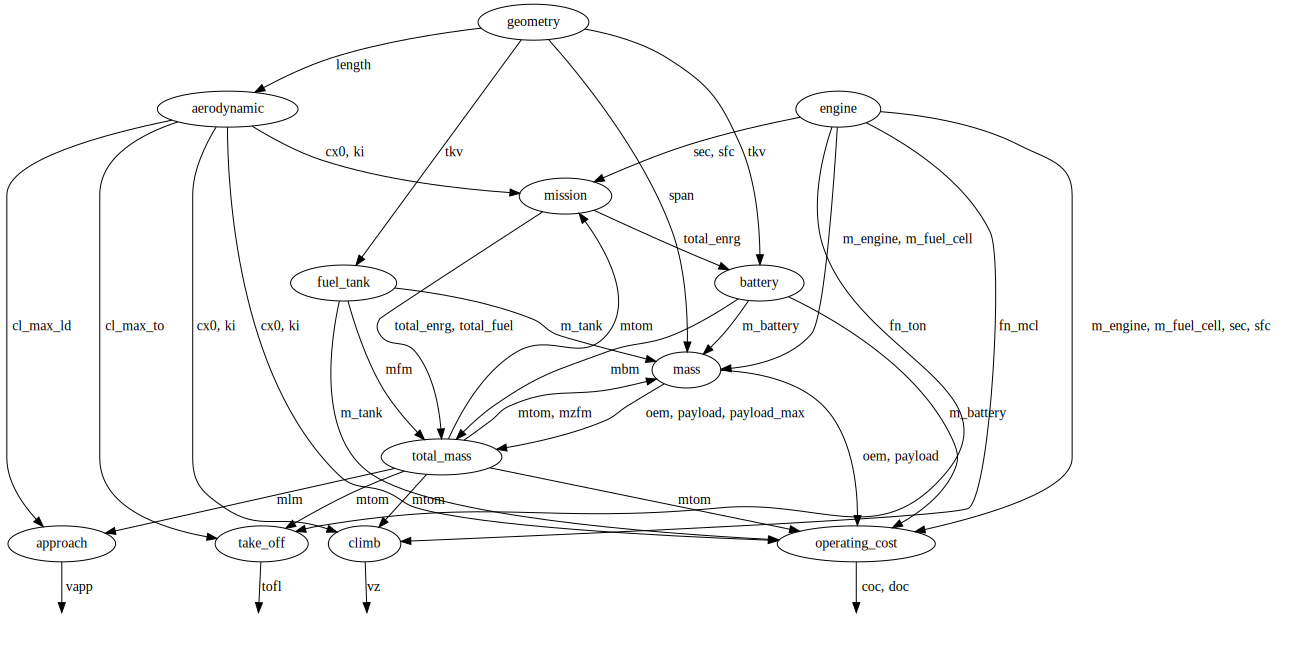

In [4]:
generate_coupling_graph(disciplines)

## Design Space

In [5]:
from gemseo_oad_training.unit import convert_from
from gemseo.scenarios.mdo_scenario import MDOScenario
from gemseo import configure_logger

configure_logger()


<RootLogger root (INFO)>

In [6]:
from gemseo.algos.parameter_space import ParameterSpace
from utils import update_default_inputs
design_space = ParameterSpace()
design_space.add_variable("slst", lower_bound=convert_from("kN", 100), upper_bound=convert_from("kN", 200), value=convert_from("kN", 150))
design_space.add_variable("n_pax", lower_bound=120, upper_bound=180, value=150)
design_space.add_variable("area", lower_bound=convert_from("m2", 100), upper_bound=convert_from("m2", 200), value=convert_from("m2", 180))
design_space.add_variable("ar", lower_bound=5, upper_bound=20, value=9)



design_space.add_random_variable("gi","OTTriangularDistribution", minimum=0.35, mode=0.4, maximum=0.405)
design_space.add_random_variable("vi","OTTriangularDistribution", minimum=0.755, mode=0.800, maximum=0.805)
design_space.add_random_variable("aef","OTTriangularDistribution", minimum=0.99, mode=1., maximum=1.03)
design_space.add_random_variable("cef","OTTriangularDistribution", minimum=0.99, mode=1., maximum=1.03)
design_space.add_random_variable("sef","OTTriangularDistribution", minimum=0.99, mode=1., maximum=1.03)



## Scenario

In [7]:
scenario = MDOScenario(disciplines, "mtom", design_space, formulation_name="MDF")

In [8]:
scenario.add_constraint("tofl", constraint_type="ineq", positive=False, value=1900.)
scenario.add_constraint("vapp", constraint_type="ineq", positive=False, value=convert_from('kt',135.0))
scenario.add_constraint("vz", constraint_type="ineq", positive=True, value=convert_from('ft/min',300.0))
scenario.add_constraint("span", constraint_type="ineq", positive=False, value=40.0)
scenario.add_constraint("length", constraint_type="ineq", positive=False, value=45.0)
scenario.add_constraint("fm", constraint_type="ineq", positive=True, value=0.0)

In [9]:
scenario.execute(algo_name="NLOPT_COBYLA", max_iter=20)


    INFO - 14:47:18: *** Start MDOScenario execution ***
    INFO - 14:47:18: MDOScenario
    INFO - 14:47:18:    Disciplines: aerodynamic approach battery climb engine fuel_tank geometry mass mission operating_cost take_off total_mass
    INFO - 14:47:18:    MDO formulation: MDF
    INFO - 14:47:18: Optimization problem:
    INFO - 14:47:18:    minimize mtom(slst, n_pax, area, ar, gi, vi, aef, cef, sef)
    INFO - 14:47:18:    with respect to aef, ar, area, cef, gi, n_pax, sef, slst, vi
    INFO - 14:47:18:    subject to constraints:
    INFO - 14:47:18:       tofl(slst, n_pax, area, ar, gi, vi, aef, cef, sef) <= 1900.0
    INFO - 14:47:18:       vapp(slst, n_pax, area, ar, gi, vi, aef, cef, sef) <= 69.44999999400001
    INFO - 14:47:18:       vz(slst, n_pax, area, ar, gi, vi, aef, cef, sef) >= 1.524
    INFO - 14:47:18:       span(slst, n_pax, area, ar, gi, vi, aef, cef, sef) <= 40.0
    INFO - 14:47:18:       length(slst, n_pax, area, ar, gi, vi, aef, cef, sef) <= 45.0
    INFO - 14

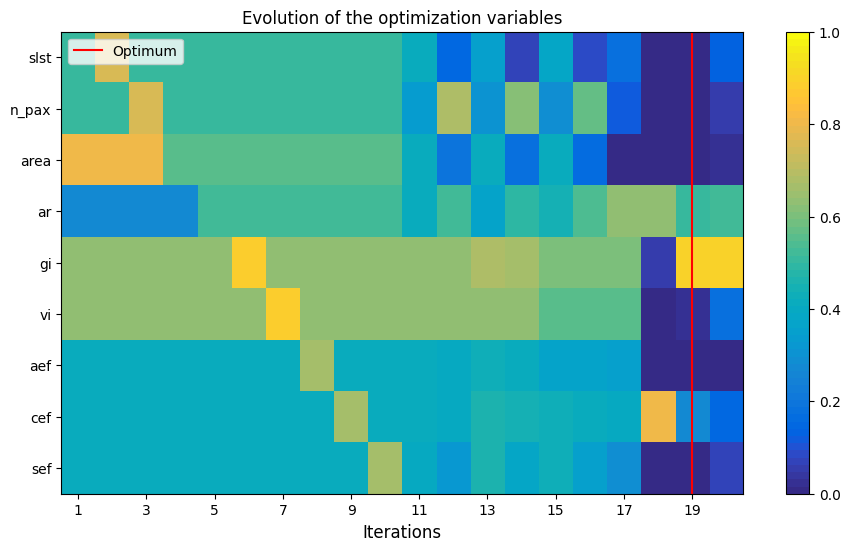

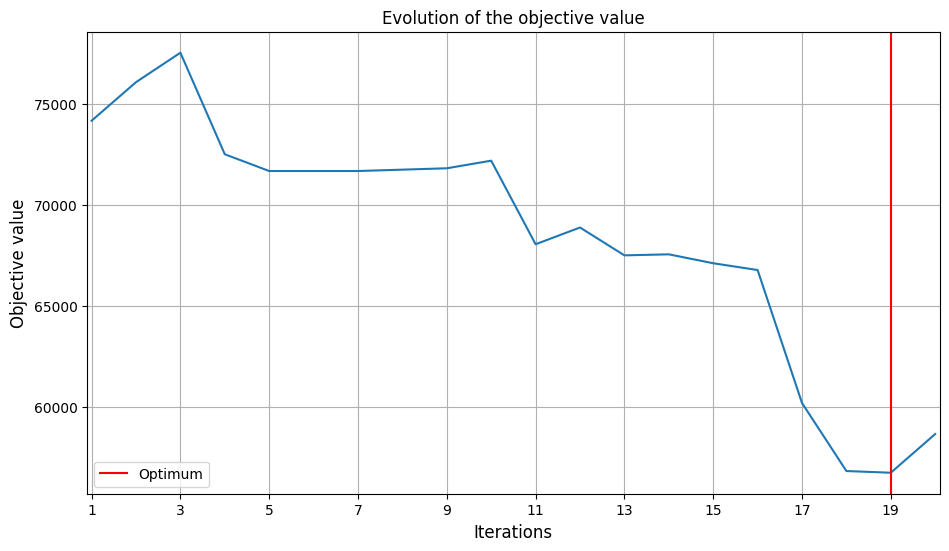

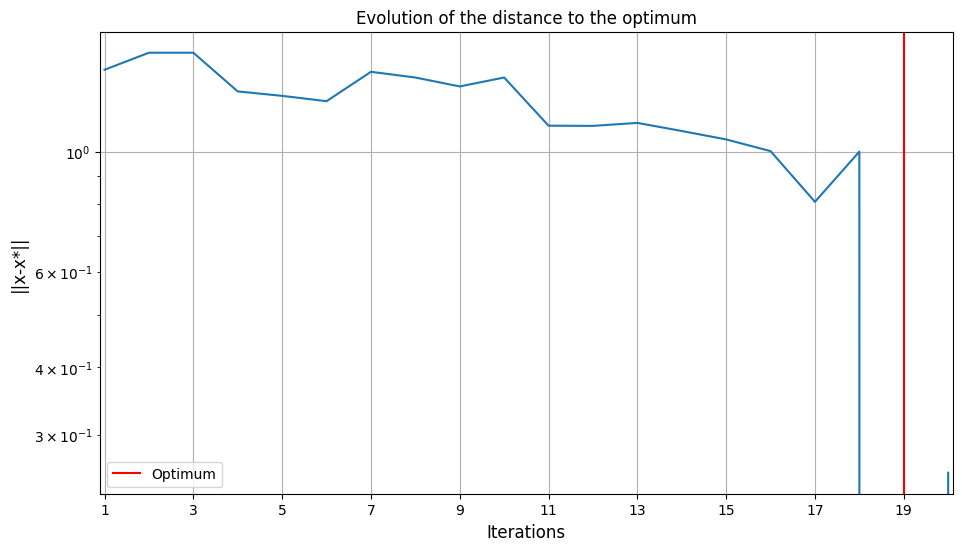

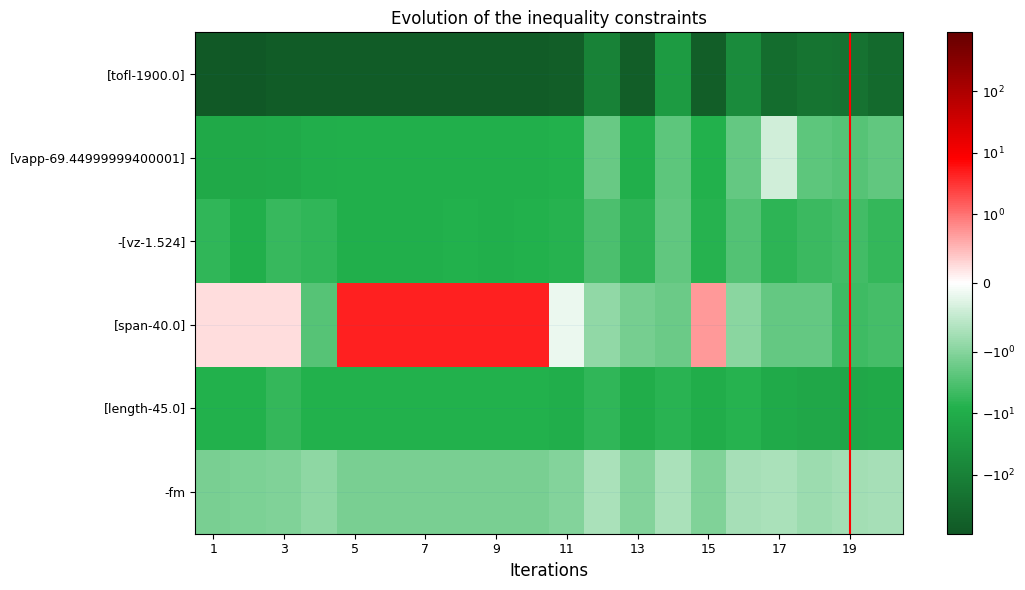

In [10]:
scenario.post_process(post_name="OptHistoryView", save=False, show=True)


# Surogate

In [ ]:
from gemseo import sample_disciplines
from gemseo.disciplines.surrogate import SurrogateDiscipline


: 

In [ ]:
training_dataset = sample_disciplines(disciplines, design_space, ["tofl", "vapp","vz","span","length","fm","mtom"], algo_name="OT_OPT_LHS", n_samples=20)
#test_dataset = sample_disciplines(disciplines, design_space, ["tofl", "vapp","vz","span","length","fm","mtom"], algo_name="OT_FULLFACT", n_samples=20)

    INFO - 14:47:21: *** Start Sampling execution ***
    INFO - 14:47:21: Sampling
    INFO - 14:47:21:    Disciplines: aerodynamic approach battery climb engine fuel_tank geometry mass mission operating_cost take_off total_mass
    INFO - 14:47:21:    MDO formulation: MDF
    INFO - 14:47:21: Running the algorithm OT_OPT_LHS:
    INFO - 14:47:21:     60%|██████    | 12/20 [00:00<00:00, 19.22 it/sec]Traceback (most recent call last):
Exception in thread subprocess:
Traceback (most recent call last):
  File "/home/n7student/2A/lh2pac/.venv/lib/python3.10/site-packages/ipykernel/iostream.py", line 142, in _event_pipe
    event_pipe = self._local.event_pipe
AttributeError: '_thread._local' object has no attribute 'event_pipe'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/n7student/2A/lh2pac/.venv/lib/python3.10/site-packages/gemseo/core/parallel_execution/callable_parallel_execution.py", line 88, in _execute_workers

In [ ]:
surrogate_discipline = SurrogateDiscipline("RBFRegressor", training_dataset)

In [ ]:
r2 = surrogate_discipline.get_error_measure("R2Measure")
r2.compute_learning_measure(as_dict=True)


{'fm': array([1.]),
 'length': array([1.]),
 'mtom': array([1.]),
 'span': array([1.]),
 'tofl': array([1.]),
 'vapp': array([1.]),
 'vz': array([1.])}

In [ ]:
r2.compute_cross_validation_measure(as_dict=True)


{'fm': array([0.84461022]),
 'length': array([0.90363941]),
 'mtom': array([0.86926807]),
 'span': array([0.88218336]),
 'tofl': array([0.81382872]),
 'vapp': array([0.85924064]),
 'vz': array([0.85561381])}

In [ ]:
rmse = surrogate_discipline.get_error_measure("RMSEMeasure")
rmse.compute_learning_measure(as_dict=True)


{'fm': array([0.01511838]),
 'length': array([0.06695185]),
 'mtom': array([1791.18738649]),
 'span': array([0.2386479]),
 'tofl': array([29.53776626]),
 'vapp': array([0.2189985]),
 'vz': array([0.51756173])}

In [ ]:
rmse.compute_cross_validation_measure(as_dict=True)


{'fm': array([0.22215474]),
 'length': array([0.89580931]),
 'mtom': array([1866.99239029]),
 'span': array([2.78920699]),
 'tofl': array([125.52870808]),
 'vapp': array([1.9743956]),
 'vz': array([1.65923447])}

In [ ]:
scenario_surrogate = MDOScenario([surrogate_discipline], "mtom", design_space, formulation_name="MDF")
scenario_surrogate.add_constraint("tofl", constraint_type="ineq", positive=False, value=1900.)
scenario_surrogate.add_constraint("vapp", constraint_type="ineq", positive=False, value=convert_from('kt',135.0))
scenario_surrogate.add_constraint("vz", constraint_type="ineq", positive=True, value=convert_from('ft/min',300.0))
scenario_surrogate.add_constraint("span", constraint_type="ineq", positive=False, value=40.0)
scenario_surrogate.add_constraint("length", constraint_type="ineq", positive=False, value=45.0)
scenario_surrogate.add_constraint("fm", constraint_type="ineq", positive=True, value=0.0)

 WARNING - 14:41:34: No coupling in MDA, switching chain_linearize to True.


In [ ]:
scenario_surrogate.execute(algo_name="NLOPT_COBYLA", max_iter=100)


    INFO - 14:41:34: *** Start MDOScenario execution ***
    INFO - 14:41:34: MDOScenario
    INFO - 14:41:34:    Disciplines: RBF_Sampling
    INFO - 14:41:34:    MDO formulation: MDF
    INFO - 14:41:34: Optimization problem:
    INFO - 14:41:34:    minimize mtom(slst, n_pax, area, ar, gi, vi, aef, cef, sef)
    INFO - 14:41:34:    with respect to aef, ar, area, cef, gi, n_pax, sef, slst, vi
    INFO - 14:41:34:    subject to constraints:
    INFO - 14:41:34:       tofl(slst, n_pax, area, ar, gi, vi, aef, cef, sef) <= 1900.0
    INFO - 14:41:34:       vapp(slst, n_pax, area, ar, gi, vi, aef, cef, sef) <= 69.44999999400001
    INFO - 14:41:34:       vz(slst, n_pax, area, ar, gi, vi, aef, cef, sef) >= 1.524
    INFO - 14:41:34:       span(slst, n_pax, area, ar, gi, vi, aef, cef, sef) <= 40.0
    INFO - 14:41:34:       length(slst, n_pax, area, ar, gi, vi, aef, cef, sef) <= 45.0
    INFO - 14:41:34:       fm(slst, n_pax, area, ar, gi, vi, aef, cef, sef) >= 0.0
    INFO - 14:41:34:    ov

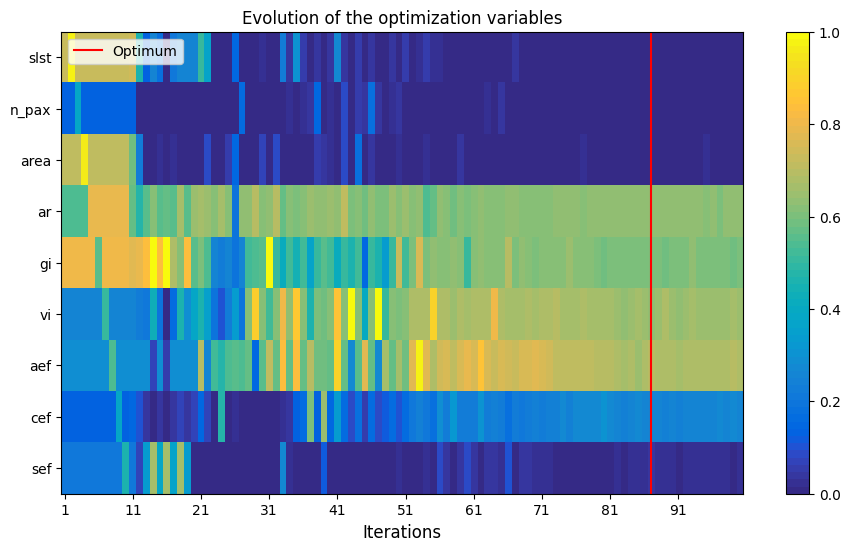

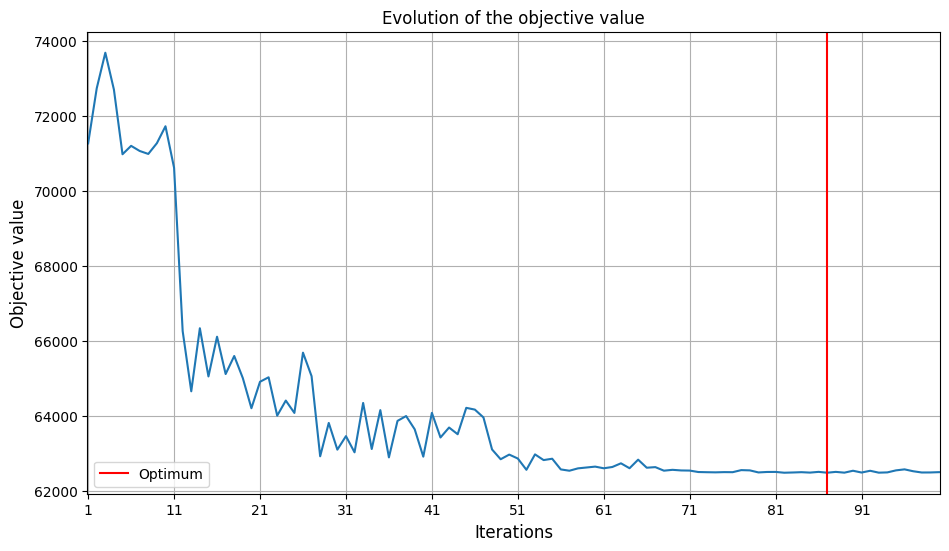

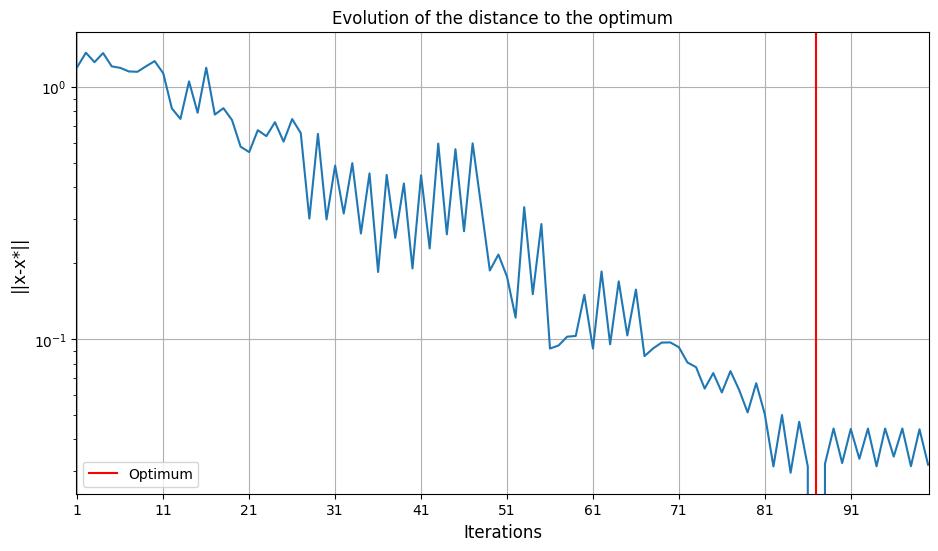

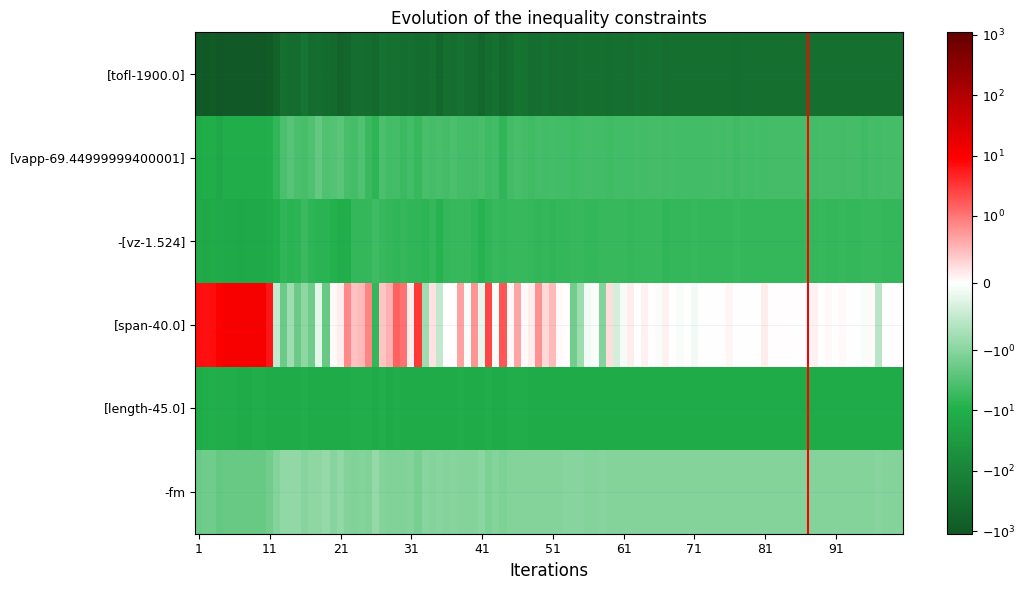

In [ ]:
scenario_surrogate.post_process(post_name="OptHistoryView", save=False, show=True)

# Evaluation de la solution optimale du surogate

In [ ]:
xopt = scenario_surrogate.optimization_result.x_opt.reshape(1, -1)
scenario.execute(algo_name="CustomDOE", samples = xopt)

    INFO - 14:41:37: *** Start MDOScenario execution ***
    INFO - 14:41:37: MDOScenario
    INFO - 14:41:37:    Disciplines: aerodynamic approach battery climb engine fuel_tank geometry mass mission operating_cost take_off total_mass
    INFO - 14:41:37:    MDO formulation: MDF
    INFO - 14:41:37: Optimization problem:
    INFO - 14:41:37:    minimize mtom(slst, n_pax, area, ar, gi, vi, aef, cef, sef)
    INFO - 14:41:37:    with respect to aef, ar, area, cef, gi, n_pax, sef, slst, vi
    INFO - 14:41:37:    subject to constraints:
    INFO - 14:41:37:       tofl(slst, n_pax, area, ar, gi, vi, aef, cef, sef) <= 1900.0
    INFO - 14:41:37:       vapp(slst, n_pax, area, ar, gi, vi, aef, cef, sef) <= 69.44999999400001
    INFO - 14:41:37:       vz(slst, n_pax, area, ar, gi, vi, aef, cef, sef) >= 1.524
    INFO - 14:41:37:       span(slst, n_pax, area, ar, gi, vi, aef, cef, sef) <= 40.0
    INFO - 14:41:37:       length(slst, n_pax, area, ar, gi, vi, aef, cef, sef) <= 45.0
    INFO - 14

# Visualisation de l'avion final

In [ ]:
from gemseo_oad_training.utils import draw_aircraft
dict_result = scenario_surrogate.optimization_result.x_opt_as_dict
draw_aircraft(area=dict_result["area"][0],slst=dict_result["slst"][0], n_pax=dict_result["n_pax"][0], title="Résultat final")

ImportError: cannot import name 'draw_aircraft' from 'gemseo_oad_training.utils' (/home/n7student/2A/lh2pac/.venv/lib/python3.10/site-packages/gemseo_oad_training/utils.py)